In [30]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [31]:
cd /content/drive/MyDrive/DeepLearning/DeepLearning01

/content/drive/MyDrive/DeepLearning/DeepLearning01


In [32]:
dir = "/content/drive/MyDrive/DeepLearning/DeepLearning01/Sheykh-Recognition"

width = 224
height = 224

In [33]:
data_generator = ImageDataGenerator(
    rescale = 1 / 255,
    validation_split = 0.2,
)

train_data = data_generator.flow_from_directory(
    dir,
    target_size = (width, height),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

validation_data = data_generator.flow_from_directory(
    dir,
    target_size = (width, height),
    batch_size = 4,
    class_mode = 'categorical',
    subset = 'validation'
)

label_map = (train_data.class_indices)
np.save('label_map.npy', label_map) 

Found 125 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [34]:
input_shape = (224, 224, 3)

model = tf.keras.models.Sequential([
         Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
         Conv2D(32, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(32, (3, 3), activation='relu'),
         Conv2D(32, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(64, (3, 3), activation='relu'),
         Conv2D(64, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(64, (3, 3), activation='relu'),
         Conv2D(64, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(128, (3, 3), activation='relu'),
         MaxPool2D((2, 2)),
         Conv2D(128, (3, 3), activation='relu'),
         Flatten(),
         Dense(256, activation='relu'),
         Dense(64, activation='relu'),
         Dense(2, activation='softmax')                          
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.binary_crossentropy,
              metrics='accuracy')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 108, 108, 32)      9248      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 51, 51, 64)       

In [35]:
# model.fit(train_data, validation_data = validation_data, epochs=10, steps_per_epoch = train_data.samples // batch_size,)
history = model.fit(train_data, validation_data = validation_data, epochs=100)


Epoch 1/100
16/16 [==============================] - 4s 174ms/step - loss: 0.6934 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 2s 146ms/step - loss: 0.6935 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.4667
Epoch 3/100
16/16 [==============================] - 2s 143ms/step - loss: 0.6933 - accuracy: 0.4720 - val_loss: 0.6931 - val_accuracy: 0.5333
Epoch 4/100
16/16 [==============================] - 2s 142ms/step - loss: 0.6931 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 2s 143ms/step - loss: 0.6931 - accuracy: 0.5360 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 2s 137ms/step - loss: 0.6930 - accuracy: 0.5120 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
16/16 [==============================] - 2s 138ms/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5000

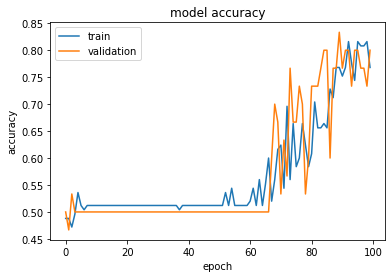

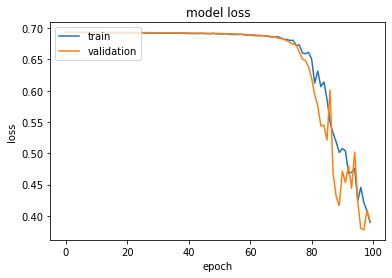

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [40]:
model.save('model.h5')

Predicted label: Normal-People


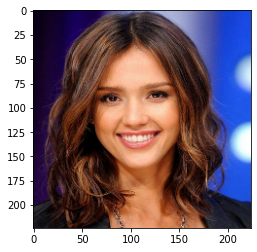

In [43]:
import cv2 
import numpy as np
from keras.models import load_model
model = load_model("model.h5")

width = 224
height = 224


img = cv2.imread("/content/drive/MyDrive/DeepLearning/DeepLearning01/test/image3.jpg")
img = cv2.resize(img, (width, height))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_np = np.array(img1)
img_np = img_np / 255.0
img_np = img_np.reshape(1, width, height, 3)

y_pred = model.predict(img_np)
prediction = np.argmax(y_pred)

label_map = np.load('label_map.npy',allow_pickle='TRUE').item()
key_list = list(label_map.keys())
val_list = list(label_map.values())

position = val_list.index(prediction)
label = key_list[position]

plt.imshow(img1)
print('Predicted label:', label)